# Bericht und Code zum Beleg Maschinelles Lernen


Name: Dennis Dominik Lehmann   
Name: Andreas Scharnetzki   

### Gliederung

* [Code](#Code)
    * [Imports](#Imports)
    * [Methodendeklaration](#Methodendeklaration)
        * [Preprocessors](#Preprocessors)
        * [Feature Extraction](#Feature-Extraction)
        * [Prints&Plots](#Prints&Plots)
* [Vorüberlegungen/Vorbereitung](#Vorüberlegungen/Vorbereitung)
    * [hinsichtlich der Aufteilung des Datensatzes](#hinsichtlich-der-Aufteilung-des-Datensatzes)
    * [hinsichtlich Feature Selection](#hinsichtlich-Feature-Selection)
    * [Hyperparameter Tuning (regarding the C-value of Logistic Regression)](#Hyperparameter-Tuning-(regarding-the-C-value-of-Logistic-Regression))
    * [N-gram Range Tuning](#N-gram-Range-Tuning)
* [Evaluation verschiedener Klassifikatoren](#Evaluation-verschiedener-Klassifikatoren)
    * [Logistische Regression](#Logistische-Regression)
        * [Logistic Regression, no preprocessing, without c-valueTuning, binary vectorisation](#Logistic-Regression,-no-preprocessing,-without-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, no preprocessing, without c-valueTuning, count vectorisation](#Logistic-Regression,-no-preprocessing,-without-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, no preprocessing, without c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-no-preprocessing,-without-c-valueTuning,-tf-idf-vectorisation)
        * [Logistic Regression, no preprocessing, with c-valueTuning, binary vectorisation](#Logistic-Regression,-no-preprocessing,-with-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, no preprocessing, with c-valueTuning, count vectorisation](#Logistic-Regression,-no-preprocessing,-with-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, no preprocessing, with c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-no-preprocessing,-with-c-valueTuning,-tf-idf-vectorisation)
        * [Logistic Regression, stemming(porter), without c-valueTuning, binary vectorisation](#Logistic-Regression,-stemming(porter),-without-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, stemming(porter), without c-valueTuning, count vectorisation](#Logistic-Regression,-stemming(porter),-without-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, stemming(porter), without c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-stemming(porter),-without-c-valueTuning,-tf-idf-vectorisation)       
        * [Logistic Regression, stemming(porter), with c-valueTuning, binary vectorisation](#Logistic-Regression,-stemming(porter),-with-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, stemming(porter), with c-valueTuning, count vectorisation](#Logistic-Regression,-stemming(porter),-with-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, stemming(porter), with c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-stemming(porter),-with-c-valueTuning,-tf-idf-vectorisation)  
        * [Logistic Regression, stemming(lancaster), without c-valueTuning, binary vectorisation](#Logistic-Regression,-stemming(lancaster),-without-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, stemming(lancaster), without c-valueTuning, count vectorisation](#Logistic-Regression,-stemming(lancaster),-without-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, stemming(lancaster), without c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-stemming(lancaster),-without-c-valueTuning,-tf-idf-vectorisation)       
        * [Logistic Regression, stemming(lancaster), with c-valueTuning, binary vectorisation](#Logistic-Regression,-stemming(lancaster),-with-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, stemming(lancaster), with c-valueTuning, count vectorisation](#Logistic-Regression,-stemming(lancaster),-with-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, stemming(lancaster), with c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-stemming(lancaster),-with-c-valueTuning,-tf-idf-vectorisation)           
        * [Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, binary vectorisation](#Logistic-Regression,-lemmatizing(WordNetLemmatizer),-without-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, count vectorisation](#Logistic-Regression,-lemmatizing(WordNetLemmatizer),-without-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-lemmatizing(WordNetLemmatizer),-without-c-valueTuning,-tf-idf-vectorisation)       
        * [Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, binary vectorisation](#Logistic-Regression,-lemmatizing(WordNetLemmatizer),-with-c-valueTuning,-binary-vectorisation)
        * [Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, count vectorisation](#Logistic-Regression,-lemmatizing(WordNetLemmatizer),-with-c-valueTuning,-count-vectorisation)
        * [Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, tf-idf vectorisation](#Logistic-Regression,-lemmatizing(WordNetLemmatizer),-with-c-valueTuning,-tf-idf-vectorisation)
        * [Logistic Regression, no preprocessing, with c-valueTuning, binary vectorisation, solver saga](#Logistic-Regression,-no-preprocessing,-with-c-valueTuning,-binary-vectorisation,-solver-saga)
    * [sonstige Klassifikatoren](#sonstige-Klassifikatoren)
        * [Decision Tree](#Decision-Tree)
    * [Fazit](#Fazit)
* [Final Pipeline](#Final-Pipeline)   
* [Evaluation auf der Testmenge](#Evaluation-auf-der-Testmenge)
* [Literaturverzeichnis](#Literaturverzeichnis)

# Code

## Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer

import matplotlib.pyplot as plt
from matplotlib import pyplot

from scipy.special import expit

import sklearn
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
#from sklearn.feature_extraction import DictVectorizer



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jizz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jizz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Methodendeklaration

In [17]:
#Deklaration globaler Variablen für Countvektorizer und Logistische Regression.
C_List = np.geomspace(1e-5, 1e5, num=20)
validatAcc =[]

# Countvektorizer
min_df=0.05
max_df=0.95
binary=True

#Logistische Regression
random_state=15
C=0.00037927
max_iter=1000
solver='liblinear'

### Preprocessors

In [18]:
# definition of PorterStemmer
def porter_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [19]:
# definition of Lancaster-Stemmer
def lancaster_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [lancaster_stemmer.stem(word) for word in words]
    return words

In [20]:
# definition of WorNetLemmatizer
def lemmatizer_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

### Feature Extraction

In [21]:
def extract_features(df,field,training,test,vectorizer="binary"):
    """
    df = (dataframe), refering to the entire data set
    field = refering to the column label, addressing the feature to be selected (e.g. "text" or "title")
    trainng = data set to be used for training purpose
    test = data set to be used for testing purpose
    vectorizer = attribute to decide what kind of vectorisation should be performed, (default = binary, optional = count, tfidf)
    
    Please note, that this method doesn't not exclude any words, since attribute "df_min" is not specified.
    This Method will always in any case make use of the countVectorizer.
    
    This method returns:
    
        train_feature_set = sparse matrix, containing each word (as key - refering to the words position in text) 
        of the training data set, mapped with its occurence (value)
        [please note that the value differes depending on which kind of vectorisation will be chosen]

        test_feature_set = sparse matrix, see train_feature_set 
        
        countVectorizer = object of typer countvectorizer, containing all necessary information for further processing
    """ 
    if "binary" in vectorizer:
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training[field].values)
        
        train_feature_set=cv.transform(training[field].values)
        test_feature_set=cv.transform(test[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    elif "counts" in vectorizer:
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training[field].values)
        
        train_feature_set=cv.transform(training[field].values)
        test_feature_set=cv.transform(test[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        # TF-IDF
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training[field].values)
        
        train_feature_set=tfidf_vectorizer.transform(training[field].values)
        test_feature_set=tfidf_vectorizer.transform(test[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer 

In [22]:
def extract_preprocessed_features(df,field,training,test,preprocessor="porter", vectorizer="CountVectorizer", binary=True):
    """
    for details regarding the attributes {df, field, training, test, preprocessor} please see "extract_features"
    
    vectorizer = vectorizer to be used (countVectorizer / TfidfVectorizer)
    binary = flag to decide if binary preprocessing should be used, if set to [False], count vectorisation will be applied
    
    Please note, that this method will exclude words that occur in less than 1% of the entire dataframe.
    
    Keep in mind, that this method will make use of Unigrams, Bigrams and Trigrams regarding feature selection, resulting in increased
    computational time.
    
    Furthermore (since a df_min parameter is introduced) this method will make use of a list of stopwords, imported and declared in
    the code section.
    
    This method returns:
    
        train_feature_set = for details see ("extract_features")
        test_feature_set = for details see ("extract_features")
        vectorizer = based on your choice (either a "Count-Vectorizer" or a "Tfidf-Vectorizer")
    """ 
    if "porter" in preprocessor:
        if "TFIDF" in vectorizer:
            tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95,ngram_range=(1, 3), tokenizer=porter_tokenizer, stop_words=stopwords, min_df=0.01)
            tfidf_vectorizer.fit_transform(training[field].values)

            train_feature_set=tfidf_vectorizer.transform(training[field].values)
            test_feature_set=tfidf_vectorizer.transform(test[field].values)

            return train_feature_set,test_feature_set,tfidf_vectorizer
        else:
            cv = CountVectorizer(binary=binary, tokenizer=porter_tokenizer, max_df=0.95, stop_words=stopwords, ngram_range=(1, 3), min_df=0.01)
            cv.fit_transform(training[field].values)

            train_feature_set=cv.transform(training[field].values)
            test_feature_set=cv.transform(test[field].values)

            return train_feature_set,test_feature_set,cv
    
    elif "lancaster" in preprocessor:
        if "TFIDF" in vectorizer:
            # TF-IDF 
            tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95, ngram_range=(1, 3), tokenizer=lancaster_tokenizer, stop_words=stopwords, min_df=0.01 )
            tfidf_vectorizer.fit_transform(training[field].values)

            train_feature_set=tfidf_vectorizer.transform(training[field].values)
            test_feature_set=tfidf_vectorizer.transform(test[field].values)

            return train_feature_set,test_feature_set,tfidf_vectorizer
        else:
            cv = CountVectorizer(binary=binary, tokenizer=lancaster_tokenizer, max_df=0.95, stop_words=stopwords, ngram_range=(1, 3), min_df=0.01)
            cv.fit_transform(training[field].values)

            train_feature_set=cv.transform(training[field].values)
            test_feature_set=cv.transform(test[field].values)

            return train_feature_set,test_feature_set,cv
    
    else:    
        if "TFIDF" in vectorizer:
            # TF-IDF 
            tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95, ngram_range=(1, 3), tokenizer=lemmatizer_tokenizer, stop_words=stopwords, min_df=0.01 )
            tfidf_vectorizer.fit_transform(training[field].values)

            train_feature_set=tfidf_vectorizer.transform(training[field].values)
            test_feature_set=tfidf_vectorizer.transform(test[field].values)

            return train_feature_set,test_feature_set,tfidf_vectorizer
        else:
            cv = CountVectorizer(binary=binary, tokenizer=lemmatizer_tokenizer, max_df=0.95, ngram_range=(1, 3), stop_words=stopwords, min_df=0.01)
            cv.fit_transform(training[field].values)

            train_feature_set=cv.transform(training[field].values)
            test_feature_set=cv.transform(test[field].values)

            return train_feature_set,test_feature_set,cv

In [23]:
# make new data processable
def new_data_extract_Words(df, cv , data , field):
    """
    df = (dataframe), refering to the entire data set
    cv = count vectorizer that should be applied to new data
    data = new data input
    field = refering to the column label, addressing the feature to be selected (e.g. "text" or "title")
    """
    return cv.transform(data[field].values)

### Prints&Plots

In [24]:
def print_confusion_matrix(X_test, y_test, model_log_reg):
    """
    X_test = Dictionary containing words (key) -> occurence (values)
    y_test = series of categories to be predicted
    model_log_reg = trained hypothesis
    """
    y_pred=model_log_reg.predict(X_test)
    cnf_matrix= metrics.confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

In [25]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
def plot_roc(X_test, y_test, model_log_reg):
    """
    X_test = Dictionary containing words (key) -> occurence (values)
    y_test = series of categories to be predicted
    model_log_reg = trained hypothesis
    """
    y_pred_proba = model_log_reg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [27]:
def plot_untrained_vs_roc(X_test, y_test, model_log_reg):
    """
    X_test = Dictionary containing words (key) -> occurence (values)
    y_test = series of categories to be predicted
    model_log_reg = trained hypothesis
    """
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model_log_reg.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [28]:
def print_result_valid_Data(X_valid, y_valid, model_log_reg):
    """
    X_valid = Dictionary containing words (key) -> occurence (values) !this data is unknown to the model_log_reg!
    y_valid = series of categories to be predicted !this data is unknown to the model_log_reg!
    model_log_reg = trained hypothesis
    """
    score = model_log_reg.score(X_valid, y_valid)
    validatAcc.append(score)
    pred_proba_t = model_log_reg.predict_proba(X_valid)
    log_loss2 = log_loss(y_valid, pred_proba_t)
    

    print("Testing Acc:", score)
    print("Log Loss:", log_loss2)

# Vorüberlegungen/Vorbereitung

## hinsichtlich der Aufteilung des Datensatzes

Zunächst unterteilten wir den Datensatz in einen Trainings- und Testteil. 
Wir wählten ein Verhältnis von 80% Trainingsdaten zu 20% Testdaten.

Um am Ende validieren zu können, wie variant die Hypthose auf Daten reagiert, welche nicht in die Trainingsphase einfloßen - sprich, um zu überprüfen, ob ein Over-/Underfitting vorliegt - hielten wir weitere 10% der Trainingsdaten zurück.

(Im Zuge der Arbeit mit diesem Datensatz stellte sich heraus, 
dass dieses Verhältnis genauere Vorhersagen lieferte als eine anfängliche Einteilung von 90% / 10%).

In [29]:
#Einlesen des Datensatzes
df = pd.read_csv('data_beleg.csv', encoding='utf-8', index_col=0)

In [30]:
X=df.drop('label', axis= 1)
X['text']= X['title']+" "+ X['text']
X = X.drop('title', axis=1)
y=df['label']

In [31]:
content_train, content_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)
content_train, content_valid, y_train, y_valid = train_test_split(content_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)
X_train,X_test,feature_transformer= extract_preprocessed_features(df,'text',content_train, content_test)

Z:\PROGRAMME\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


## hinsichtlich Feature Selection

Beim Verarbeiten natürlicher Sprache gilt es vielerlei Dinge zu beachten. 

Um Texte, welche in natürlicher Sprache verfasst worden sind, zu analysieren, müssen die einzelnen Worte in sogenannte **features** umgewandelt werden. Ein **feature** repräsentiert dabei den Grundwortstamm des zu untersuchenden Worts.
Im Idealfall erkennt ein Klassifikator ein Wort unabhängig von seiner Deklination und kann somit sämtliche Vorkommen des Wortes innerhalb des zu untersuchenden Texts korrekt zuordnen.

Der Vorgang der **Feature Selection** untergliedert sich in mehrer Teilschritte. 

Der Umstand, dass die Daten aufgrund von Deklination in verschiedenster Form vorliegen, erschwert zunächst die Auswahl der Features (schließlich sollten beispielsweise Singular- und Pluralformen des selben Wortes nicht als separate Features interpretiert werden). Hierfür stehen verschiedene Möglichkeiten der Vorverarbeitung der Daten zur Verfügung. 

Ein **Stemm-Algorithmus** (wir verwendeten für dieses Aufgabe *Porter's Algorithmus* und führten auch Versuche mit dem vergleichsweise aggressiveren *Lancaster-Stemmer* durch) arbeitet wie eine reguläre Sprache und schneidet - mehr oder weniger grob - nach einfachen Regeln die Endungen der Worte ab und reduziert sie somit - manchmal jeglicher Grammatik entbehrend - auf ihren (vermeintlichen) Wortstamm. Die nachfolgende Grafik verdeutlicht die Vorgehensweise des Porter-Algorithmus:


![image.png](https://nlp.stanford.edu/IR-book/html/htmledition/img100.png)
<font size="1"><center>src: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html</center></font>


Eine deutlich ausgeklügeltere Variante stellt die Bearbeitung der Daten mittels **Lemmatisierung** dar (wir verwendeten den *WordNetLemmatizer*). Dabei werden Eingabedaten anhand der grammatikalischen Regeln einer beim Methodenaufruf übergebenen Sprache zusammengefasst. 

So würde beispielsweise die Mehrzahl **mice** korrekterweise ihrem eigentlichen Singular **mouse** zugeordnet.
Das Verfahren ist im Vergleich, zu Ansätzen welche mit Stemmern arbeiten, verhältnismäßig rechenaufwändiger.

Stemmer und Lemmatisierer dienen dem **Information gain**, beziehungsweise der Reduzierung der Entropie innerhalb eines Datensatzes.

Egal ob eine Vorverarbeitung im Sinne des *Stemmen* oder *Lemmatisieren* stattfinden soll, bleibt die grundlegende Herangehensweise jedoch gleich und nach dem mehr oder weniger rechenintensiven Vorverarbeiten des Textes, geht es nun an die Einteilung der Wörter in sogenannte **Tokens**.

Bei der Tokenisierung werden (falls nicht schon zuvor geschehen) unter Verwendung *regulärer Ausdrücke* zunächst Sonderzeichen, Interpunktion und manchmal auch Zahlen aus dem zu untersuchenden Text (auch Corpus genannt) entfernt. 

Einfache Tokenisierungsverfahren bilden jedes Wort einzeln in die Untersuchungsmenge ab, aufwändigere Verfahren bilden Worttupel (siehe *ngram_range*) und berücksichtigen somit auch komplexere Wortgebilde wie beispielsweise einfache Negationen. Im nachfolgenden Abschnitt **N-gram Range Tuning** wird ersichtlich, dass eine Texteinteilung im Sinne der Trigram-Bildung am präzisesten arbeitet.

In der Phase der anschließenden **Vektorisierung** wird nun die Vorkommenshäufigkeit der Wörter in Beziehung zur Länge des Datensatzes gesetzt. Dabei unterscheiden sich die Zählverfahren (so zählt die *binary*-Einstellung lediglich, ob ein Wort im entsprechenden Text auftaucht oder nicht; *count* hingegen zählt die Auftretenshäufigkeit und *tf-idf* setzt die Auftretenshäufigkeit mit der Länge des Textcorpus' in Beziehung).

Eine Auflistung der Vorkommenswahrscheinlichkeit bezogen (auf den gesamten Datensatz) schon gestemmer bzw. lemmatisierter Wörter, sowie eine Auflistung der Vorkommensanzahl einzelner Wortstämme folgt hier:

In [32]:
import operator
res = dict(zip(feature_transformer.get_feature_names(), mutual_info_classif(X_train, y_train, discrete_features=True)))
sorted_res = dict(sorted(res.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_res)

Dictionary in descending order by value :  {'recip': 0.1752225112255711, 'cook': 0.1024647840554026, 'cup': 0.10077758534965638, 'bake': 0.10013896918215104, 'salt': 0.09762411551775543, 'minut': 0.09098816016750058, 'oven': 0.08053718056738454, 'add': 0.0760745095191775, 'bowl': 0.07285350966855791, 'butter': 0.0726831622790644, '1 2': 0.07194030005469676, 'ingredi': 0.07179834537501864, 'tablespoon': 0.07029859398902921, 'sugar': 0.06833316576891252, '2 cup': 0.0655707197695127, 'mixtur': 0.06528013075686617, 'stir': 0.06415195297767107, 'flour': 0.06167152434557906, 'serv': 0.0616675455628235, 'medium': 0.06003958942025707, 'heat': 0.05967945544280011, '2': 0.05879742861110335, 'teaspoon': 0.05862684384361305, 'preheat': 0.05679614422712795, '4 cup': 0.056540276081415396, 'food': 0.05632431972081002, 'pan': 0.05588478738577224, '1': 0.054747678105564274, 'brown': 0.05428424315816962, 'mix': 0.054258624129062016, 'thi recip': 0.05169460232137991, 'preheat oven': 0.05145456747299616, 

In [33]:
print("Vocabulary size: {}".format(len(feature_transformer.vocabulary_)))
print("Vocabulary content:\n {}".format(feature_transformer.vocabulary_))

#Auszug aus: Andreas C. Müller and Sarah Guido. „Introduction to Machine Learning with Python.“ Apple Books. 

Vocabulary size: 3509
Vocabulary content:
 {'twice': 3271, 'bake': 410, 'potato': 2378, 'recip': 2525, 'allrecip': 293, 'com': 754, 'realli': 2517, 'good': 1444, 'big': 485, 'fan': 1239, 'sour': 2882, 'cream': 871, 'chees': 667, 'miss': 2042, 'certainli': 650, 'enjoy': 1137, 'add': 246, 'american': 316, 'top': 3213, 'could': 849, 'use': 3307, '1': 14, '4': 155, 'cup': 902, 'cheddar': 665, 'mixtur': 2051, 'like': 1851, 'mix': 2045, 'garlic': 1402, 'oil': 2176, 'green': 1477, 'onion': 2202, 'chop': 700, 'bacon': 406, 'make': 1921, 'sure': 3027, 'got': 1450, 'lot': 1894, 'salt': 2665, 'pepper': 2301, 'wa': 3361, 'thi': 3127, 'review': 2611, 'help': 1558, 'ye': 3487, '39': 154, 'user': 3314, 'found': 1355, 'variat': 3325, 'parent': 2266, 'taught': 3081, 'love': 1895, 'butter': 579, 'one': 2192, 'recip allrecip': 2526, 'allrecip com': 294, 'realli good': 2518, 'sour cream': 2883, 'cream chees': 874, 'use 1': 3308, '1 4': 28, '4 cup': 159, 'green onion': 1478, 'make sure': 1927, 'salt pepper

Die Liste der ersten zehn besonders diskriminierenden Worte (in dem Sinne, dass sie - bezogen auf die Gesamtdatenmenge - den größten Gehalt an **mutual information** innehaben) ist nachfolgend  hier aufgeführt.<br><br>Diese Liste lässt vermuten, dass der Target-value darüber entscheidet, ob es sich beim untersuchten Text um ein Rezept handelt oder nicht. <br><br>( ^ _^)

In [34]:
top_ten =list(sorted_res.items())[:10]
for s in top_ten:
    print(*s)

recip 0.1752225112255711
cook 0.1024647840554026
cup 0.10077758534965638
bake 0.10013896918215104
salt 0.09762411551775543
minut 0.09098816016750058
oven 0.08053718056738454
add 0.0760745095191775
bowl 0.07285350966855791
butter 0.0726831622790644


## Hyperparameter Tuning (regarding the C-value of Logistic Regression)

Wenn ein Modell zu sehr auf seinen Trainingsdatensatz hin optimiert wird, besteht die Gefahr des **overfittings**. 
Ein solches Modell arbeitet dann sehr gut auf dem ihm bekannten Datensatz, erzielt durch seine hohe Spezifikation aber deutlich  schlechtere Ergebnisse auf noch unbekannten Datensätzen.

Das Gegenteil hiervon wäre das **underfitting** - ein solches Modell bildet die komplexen Zusammenhänge die zwischen den einzelnen Features bestehen nicht präzise genug ab um verlässliche Vorhersage zu treffen.

Ziel ist over- wie auch underfitting zu verhindern und ein Modell so zu trainieren, dass es - unabhängig davon auf welchen Datensätzen es arbeitet - mit geringsmöglicher Varianz präzise Vorhersagen zu treffen bzw. Klassifikationen vorzunehmen. 

Alle Variablen welche Einfluss auf das "Lernverhalten" eines Algorithmus haben, können als **Hyperparameter** bezeichnet werden.
Einer dieser Hyperparameter ist der sogenannte **C-Value**. Er repräsentiert die Stellschraube, mit welcher man Einfluss darauf nehmen kann, wie stark in Bezug auf die einzelnen Koeffizienten regularisiert wird. Ein niedriger C-Wert resultiert in einer stärkeren Regularisierung (je geringer der C-value, desto mehr streben die Koeffizienten gegen Null) und umgekehrt.

Weitere Hyperparameter sind beispielsweise die Anzahl der Iterationen (für unser Modell haben sich tausend Iterationen als guter Mittelweg zwischen Genauigkeit und Performancegeschwindigkeit ergeben), oder die Wahl der penalty (bei der nachfolgenden Evaluation standardmäßig auf "Ridge Regression" bzw. "l2" eingestellt, da diese im Gegensatz zur "Lasso Regression" bzw. "l1" weniger relevante features nicht ignoriert und auch mit weniger Iterationen arbeiten kann als "l1").

<font size="2"><center>**Kostenfunktion mit l2 penalty (gelb gekennzeichnet)**</center></font>
![image.png](https://miro.medium.com/max/243/1*jgWOhDiGjVp-NCSPa5abmg.png)
<font size="1"><center>src: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c</center></font>



Im nachfolgendne Codebeispiel werden dem Modell exemplarisch zwanzig verschiedene C-Values im Bereich von [1e-5, 1e5] übergeben. Der C-Wert welcher im geringsten LogLoss resultiert, findet Verwendung in der nachfolgenden Evaluation verschiedener Variationen der Logistischen Regression.

In [35]:
C_List_test = np.geomspace(1e-5, 1e5, num=20)
#c-value applied to model
CA = []
Logarithmic_Loss = []

for c in C_List_test:
    log_reg2 = LogisticRegression(random_state=10, max_iter=1000 ,solver =solver, C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)

# putting the outcomes in a Table

# reshaping
CA = np.array(CA).reshape(20,)
Logarithmic_Loss = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List_test, CA, Logarithmic_Loss)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C-values", 'C-vals applied to model','Logarithmic_Loss'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss", ascending = True).reset_index()

,index,C-values,C-vals applied to model,Logarithmic_Loss
0,6,0.014384,0.818475,0.452071
1,5,0.004281,0.818475,0.460471
2,7,0.048329,0.814178,0.478409
3,4,0.001274,0.828142,0.493314
4,3,0.000379,0.820623,0.547084
5,8,0.162378,0.795918,0.561434
6,2,0.000113,0.790548,0.608599
7,1,0.000034,0.643394,0.654764
8,0,0.000010,0.556391,0.678794
9,9,0.545559,0.766917,0.727262


Darstellung der Ergebnisse in Form von Konfusionsmatrizen.

The CA of C parameter 1e-05 is 0.556390977443609:
The Logg Loss of C parameter 1e-05 is 0.6787942472938109:



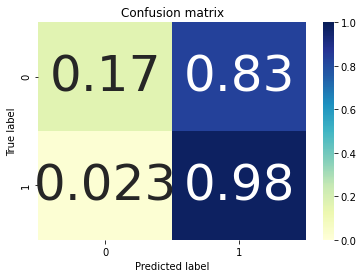

The CA of C parameter 3.359818286283781e-05 is 0.6433941997851772:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6547644082254023:



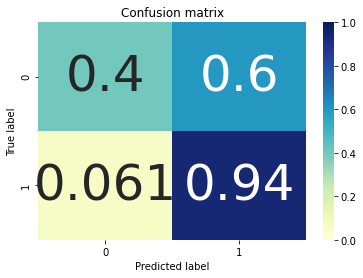

The CA of C parameter 0.00011288378916846884 is 0.790547798066595:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6085987289195601:



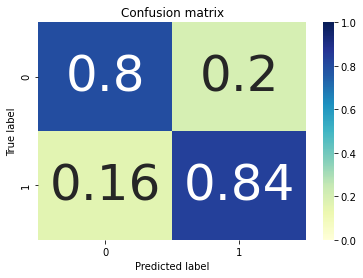

The CA of C parameter 0.000379269019073225 is 0.8206229860365198:
The Logg Loss of C parameter 0.000379269019073225 is 0.5470836111738702:



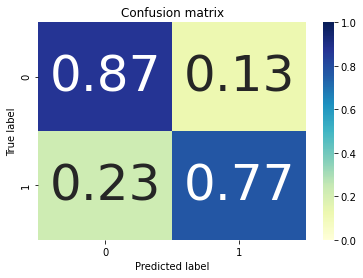

The CA of C parameter 0.0012742749857031334 is 0.8281417830290011:
The Logg Loss of C parameter 0.0012742749857031334 is 0.49331351899275644:



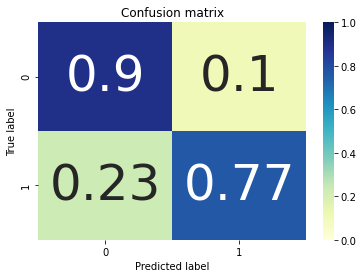

The CA of C parameter 0.004281332398719391 is 0.8184747583243824:
The Logg Loss of C parameter 0.004281332398719391 is 0.46047149689048916:



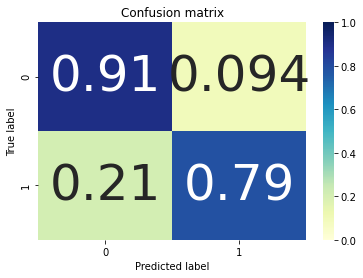

The CA of C parameter 0.01438449888287663 is 0.8184747583243824:
The Logg Loss of C parameter 0.01438449888287663 is 0.4520712325459602:



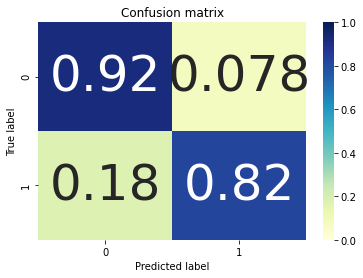

The CA of C parameter 0.04832930238571752 is 0.8141783029001074:
The Logg Loss of C parameter 0.04832930238571752 is 0.47840886921725123:



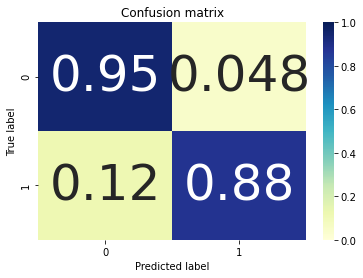

The CA of C parameter 0.1623776739188721 is 0.7959183673469388:
The Logg Loss of C parameter 0.1623776739188721 is 0.5614341450348611:



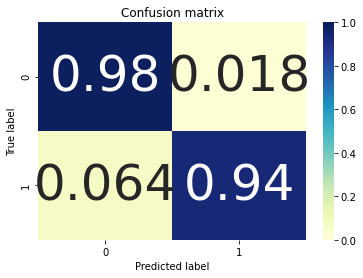

The CA of C parameter 0.5455594781168515 is 0.7669172932330827:
The Logg Loss of C parameter 0.5455594781168515 is 0.7272618685780736:



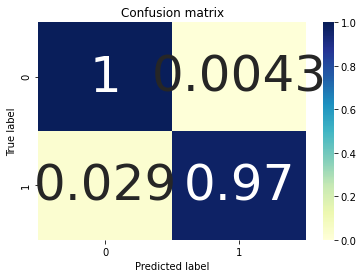

The CA of C parameter 1.8329807108324339 is 0.7529538131041891:
The Logg Loss of C parameter 1.8329807108324339 is 0.9965761473218773:



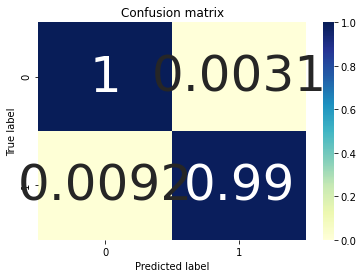

The CA of C parameter 6.1584821106602545 is 0.7465091299677766:
The Logg Loss of C parameter 6.1584821106602545 is 1.3669262759521015:



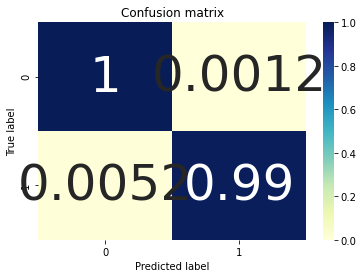

The CA of C parameter 20.6913808111479 is 0.7271750805585392:
The Logg Loss of C parameter 20.6913808111479 is 1.8176411166122695:



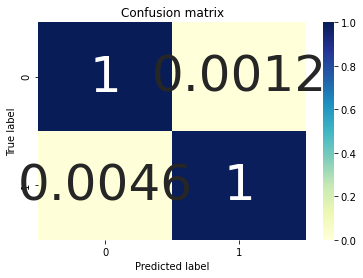

The CA of C parameter 69.51927961775606 is 0.728249194414608:
The Logg Loss of C parameter 69.51927961775606 is 2.3053916165730395:



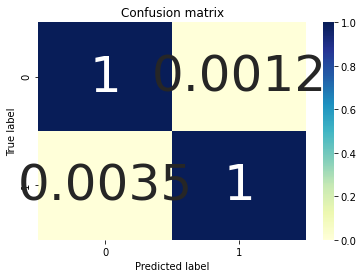

The CA of C parameter 233.57214690901213 is 0.7250268528464017:
The Logg Loss of C parameter 233.57214690901213 is 2.8054717813042833:



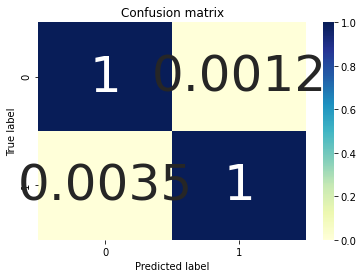

The CA of C parameter 784.7599703514607 is 0.723952738990333:
The Logg Loss of C parameter 784.7599703514607 is 3.2902654109655574:



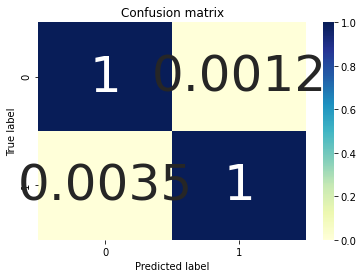

The CA of C parameter 2636.6508987303555 is 0.7228786251342643:
The Logg Loss of C parameter 2636.6508987303555 is 3.750921556274237:



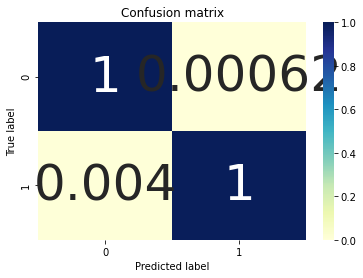

The CA of C parameter 8858.667904100832 is 0.7228786251342643:
The Logg Loss of C parameter 8858.667904100832 is 4.07182431099875:



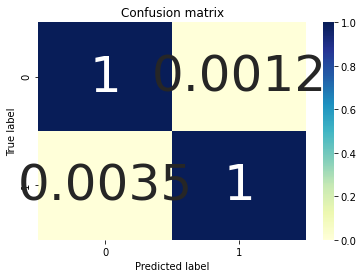

The CA of C parameter 29763.51441631313 is 0.7250268528464017:
The Logg Loss of C parameter 29763.51441631313 is 4.103366400934376:



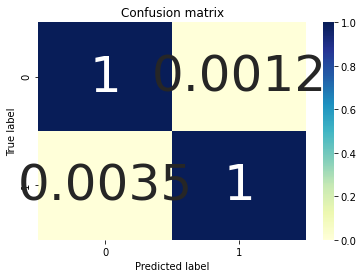

The CA of C parameter 100000.0 is 0.723952738990333:
The Logg Loss of C parameter 100000.0 is 4.162760555968847:



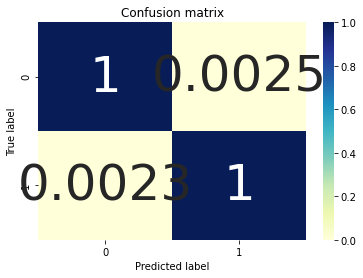

In [36]:
#Plots of confusion matrices for twenty c-value in range of [1e-5, 1e5]
CA = []
Logarithmic_Loss = []

for c in C_List_test:
    log_reg_test = LogisticRegression(random_state=10, solver = solver, C=c)
    log_reg_test.fit(X_train, y_train)
    score = log_reg_test.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg_test.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg_test.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg_test.classes_, title='Confusion matrix')
    plt.show()

## N-gram Range Tuning

Bei diesem Versuch die Vorhersagegenauigkeit unseres Modells zu erhöhen überprüften wir, 
ob die Verwendung von Unigrammen, Bigrammen oder Trigrammen bei der Tokenisierung bessere Vorhersagen erzielt werden konnten.
Zu beachten ist hierbei, dass beispielweise die Verwendung von Bigrammen die Verwendung von Unigrammen mit einschließt.

Um die Aussagekraft der hier gewonnen Erkenntnis noch zu untermauern, ließen wir das Modell den Vergleich mit 6 verschiedenen C-values 

**<center>[0.001, 0.01, 0.1, 1, 10, 100]</center>**

ausführen. Wenig überraschend liefert die Verwendung von Trigrammen (und somit auch Bi- und Unigrammen als Features) die beste Vorhersagegenauigkeit.

In [37]:
pipe = sklearn.pipeline.make_pipeline(TfidfVectorizer(max_df=0.95), LogisticRegression(random_state=15, max_iter=1000, solver=solver, penalty='l2'))
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = sklearn.model_selection.GridSearchCV(pipe, param_grid, cv=5)
grid.fit(content_train['text'], y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

#Auszug aus: Andreas C. Müller and Sarah Guido. „Introduction to Machine Learning with Python.“ 

KeyboardInterrupt: 

# Evaluation verschiedener Klassifikatoren

## Logistische Regression

Analog zum Beispiel aus dem Kapitel "**Hyperparameter Tuning**" verwenden wir bei sämtlichen Modellen welche mit **c-valueTuning** überschrieben sind das Verfahren der **Cross-Validation** um den optimalen C-value bestimmen zu lassen.

### Logistic Regression, no preprocessing, without c-valueTuning, binary vectorisation

In [ ]:
X_train1,X_test1,feature_transformer1= extract_features(df,field='text', training=content_train, test=content_test)
X_valid1 = new_data_extract_Words(df ,feature_transformer1, content_valid, field='text')

In [ ]:
scikit_log_reg1 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg1=scikit_log_reg1.fit(X_train1, y_train)

In [ ]:
print_confusion_matrix(X_test1, y_test, model_log_reg1)

In [ ]:
plot_untrained_vs_roc(X_test1, y_test, model_log_reg1)

In [ ]:
print_result_valid_Data(X_valid1, y_valid, model_log_reg1)

### Logistic Regression, no preprocessing, without c-valueTuning, count vectorisation

In [ ]:
X_train2,X_test2,feature_transformer2= extract_features(df,field='text', training=content_train, test=content_test, vectorizer="counts")
X_valid2 = new_data_extract_Words(df ,feature_transformer2, content_valid, field='text')

In [ ]:
scikit_log_reg2 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg2=scikit_log_reg2.fit(X_train2, y_train)

In [ ]:
print_confusion_matrix(X_test2, y_test, model_log_reg2)

In [ ]:
plot_untrained_vs_roc(X_test2, y_test, model_log_reg2)

In [ ]:
print_result_valid_Data(X_valid2, y_valid, model_log_reg2)

### Logistic Regression, no preprocessing, without c-valueTuning, tf-idf vectorisation

In [ ]:
X_train3,X_test3,feature_transformer3= extract_features(df,field='text', training=content_train, test=content_test, vectorizer="TFIDF")
X_valid3 = new_data_extract_Words(df ,feature_transformer3, content_valid, field='text')

In [ ]:
scikit_log_reg3 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg3=scikit_log_reg3.fit(X_train3, y_train)

In [ ]:
print_confusion_matrix(X_test3, y_test, model_log_reg3)

In [ ]:
plot_untrained_vs_roc(X_test3, y_test, model_log_reg3)

In [ ]:
print_result_valid_Data(X_valid3, y_valid, model_log_reg3)

### Logistic Regression, no preprocessing, with c-valueTuning, binary vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg, cross-validation estimator.
Log_reg1 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg1.fit(X_train1, y_train)
print("The CA is:", Log_reg1.score(X_test1, y_test))
pred_proba_t = Log_reg1.predict_proba(X_test1)
log_loss1 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss1)

print("The optimal C parameter is: ", Log_reg1.C_)

In [ ]:
scikit_log_reg4 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg1.C_[0], penalty='l2')
model_log_reg4=scikit_log_reg4.fit(X_train1, y_train)

In [ ]:
print_confusion_matrix(X_test1, y_test, model_log_reg4)

In [ ]:
plot_untrained_vs_roc(X_test1, y_test, model_log_reg4)

In [ ]:
print_result_valid_Data(X_valid1, y_valid, model_log_reg4)

### Logistic Regression, no preprocessing, with c-valueTuning, count vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg2 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg2.fit(X_train2, y_train)
print("The CA is:", Log_reg2.score(X_test2, y_test))
pred_proba_t = Log_reg2.predict_proba(X_test2)
log_loss2 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss2)

print("The optimal C parameter is: ", Log_reg2.C_)

In [ ]:
scikit_log_reg5 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg2.C_[0], penalty='l2')
model_log_reg5=scikit_log_reg5.fit(X_train2, y_train)

In [ ]:
print_confusion_matrix(X_test2, y_test, model_log_reg5)

In [ ]:
plot_untrained_vs_roc(X_test2, y_test, model_log_reg5)

In [ ]:
print_result_valid_Data(X_valid2, y_valid, model_log_reg5)

### Logistic Regression, no preprocessing, with c-valueTuning, tf-idf vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg3.fit(X_train3, y_train)
print("The CA is:", Log_reg3.score(X_test3, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test3)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

In [ ]:
scikit_log_reg6 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg3.C_[0], penalty='l2')
model_log_reg6=scikit_log_reg6.fit(X_train1, y_train)

In [ ]:
print_confusion_matrix(X_test3, y_test, model_log_reg6)

In [ ]:
plot_untrained_vs_roc(X_test3, y_test, model_log_reg6)

In [ ]:
print_result_valid_Data(X_valid3, y_valid, model_log_reg6)

### Logistic Regression, stemming(porter), without c-valueTuning, binary vectorisation

In [ ]:
X_train4, X_test4, feature_transformer4= extract_preprocessed_features(df,field='text', training=content_train, test=content_test)
X_valid4 = new_data_extract_Words(df ,feature_transformer4, content_valid, field='text')

In [ ]:
scikit_log_reg7 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg7=scikit_log_reg7.fit(X_train4, y_train)

In [ ]:
print_confusion_matrix(X_test4, y_test, model_log_reg7)

In [ ]:
plot_untrained_vs_roc(X_test4, y_test, model_log_reg7)

In [ ]:
print_result_valid_Data(X_valid4, y_valid, model_log_reg7)

### Logistic Regression, stemming(porter), without c-valueTuning, count vectorisation

In [ ]:
X_train5, X_test5, feature_transformer5= extract_preprocessed_features(df=df,field='text', training=content_train, test=content_test, binary=False)
X_valid5 = new_data_extract_Words(df ,feature_transformer5, content_valid, field='text')

In [ ]:
scikit_log_reg8 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg8=scikit_log_reg8.fit(X_train5, y_train)

In [ ]:
print_confusion_matrix(X_test5, y_test, model_log_reg8)

In [ ]:
plot_untrained_vs_roc(X_test5, y_test, model_log_reg8)

In [ ]:
print_result_valid_Data(X_valid5, y_valid, model_log_reg8)

### Logistic Regression, stemming(porter), without c-valueTuning, tf-idf vectorisation

In [ ]:
X_train6, X_test6, feature_transformer6= extract_preprocessed_features(df=df,field='text', training=content_train, test=content_test,vectorizer='TFIDF', binary=False)
X_valid6 = new_data_extract_Words(df ,feature_transformer6, content_valid, field='text')

In [ ]:
scikit_log_reg9 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg9=scikit_log_reg9.fit(X_train6, y_train)

In [ ]:
print_confusion_matrix(X_test6, y_test, model_log_reg9)

In [ ]:
plot_untrained_vs_roc(X_test6, y_test, model_log_reg9)

In [ ]:
print_result_valid_Data(X_valid6, y_valid, model_log_reg9)

### Logistic Regression, stemming(porter), with c-valueTuning, binary vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg, cross-validation estimator.
Log_reg4 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg4.fit(X_train4, y_train)
print("The CA is:", Log_reg4.score(X_test4, y_test))
pred_proba_t = Log_reg4.predict_proba(X_test4)
log_loss4 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss4)

print("The optimal C parameter is: ", Log_reg4.C_)

In [ ]:
scikit_log_reg10 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg4.C_[0], penalty='l2')
model_log_reg10=scikit_log_reg10.fit(X_train4, y_train)

In [ ]:
print_confusion_matrix(X_test4, y_test, model_log_reg10)

In [ ]:
plot_untrained_vs_roc(X_test4, y_test, model_log_reg10)

In [ ]:
print_result_valid_Data(X_valid4, y_valid, model_log_reg10)

### Logistic Regression, stemming(porter), with c-valueTuning, count vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg5 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg5.fit(X_train5, y_train)
print("The CA is:", Log_reg5.score(X_test5, y_test))
pred_proba_t = Log_reg5.predict_proba(X_test5)
log_loss5 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss5)

print("The optimal C parameter is: ", Log_reg5.C_)

In [ ]:
scikit_log_reg11 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg2.C_[0], penalty='l2')
model_log_reg11=scikit_log_reg11.fit(X_train5, y_train)

In [ ]:
print_confusion_matrix(X_test5, y_test, model_log_reg11)

In [ ]:
plot_untrained_vs_roc(X_test5, y_test, model_log_reg11)

In [ ]:
print_result_valid_Data(X_valid5, y_valid, model_log_reg11)

### Logistic Regression, stemming(porter), with c-valueTuning, tf-idf vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg6 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg6.fit(X_train6, y_train)
print("The CA is:", Log_reg6.score(X_test6, y_test))
pred_proba_t = Log_reg6.predict_proba(X_test6)
log_loss6 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss6)

print("The optimal C parameter is: ", Log_reg6.C_)

In [ ]:
scikit_log_reg12 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg3.C_[0], penalty='l2')
model_log_reg12=scikit_log_reg12.fit(X_train6, y_train)

In [ ]:
print_confusion_matrix(X_test6, y_test, model_log_reg12)

In [ ]:
plot_untrained_vs_roc(X_test6, y_test, model_log_reg12)

In [ ]:
print_result_valid_Data(X_valid6, y_valid, model_log_reg12)

### Logistic Regression, stemming(lancaster), without c-valueTuning, binary vectorisation

In [ ]:
X_train7, X_test7, feature_transformer7= extract_preprocessed_features(df=df, field='text', training=content_train, test=content_test, preprocessor='lancaster')
X_valid7 = new_data_extract_Words(df ,feature_transformer7, content_valid, field='text')

In [ ]:
scikit_log_reg13 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg13=scikit_log_reg13.fit(X_train7, y_train)

In [ ]:
print_confusion_matrix(X_test7, y_test, model_log_reg13)

In [ ]:
plot_untrained_vs_roc(X_test7, y_test, model_log_reg13)

In [ ]:
print_result_valid_Data(X_valid7, y_valid, model_log_reg13)

### Logistic Regression, stemming(lancaster), without c-valueTuning, count vectorisation

In [ ]:
X_train8, X_test8, feature_transformer8= extract_preprocessed_features(df=df,field='text', training=content_train, test=content_test, binary=False, preprocessor="lancaster")
X_valid8 = new_data_extract_Words(df ,feature_transformer8, content_valid, field='text')

In [ ]:
scikit_log_reg14 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg14=scikit_log_reg8.fit(X_train8, y_train)

In [ ]:
print_confusion_matrix(X_test8, y_test, model_log_reg14)

In [ ]:
plot_untrained_vs_roc(X_test8, y_test, model_log_reg14)

In [ ]:
print_result_valid_Data(X_valid8, y_valid, model_log_reg14)

### Logistic Regression, stemming(lancaster), without c-valueTuning, tf-idf vectorisation

In [ ]:
X_train9, X_test9, feature_transformer9= extract_preprocessed_features(df=df,field='text', training=content_train, test=content_test ,vectorizer='TFIDF', preprocessor="lancaster", binary=False)
X_valid9 = new_data_extract_Words(df ,feature_transformer9, content_valid, field='text')

In [ ]:
scikit_log_reg15 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg15=scikit_log_reg15.fit(X_train9, y_train)

In [ ]:
print_confusion_matrix(X_test9, y_test, model_log_reg15)

In [ ]:
plot_untrained_vs_roc(X_test9, y_test, model_log_reg15)

In [ ]:
print_result_valid_Data(X_valid9, y_valid, model_log_reg15)

### Logistic Regression, stemming(lancaster), with c-valueTuning, binary vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg, cross-validation estimator.
Log_reg7 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg7.fit(X_train7, y_train)
print("The CA is:", Log_reg7.score(X_test7, y_test))
pred_proba_t = Log_reg7.predict_proba(X_test7)
log_loss7 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss7)

print("The optimal C parameter is: ", Log_reg7.C_)

In [ ]:
scikit_log_reg16 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg7.C_[0], penalty='l2')
model_log_reg16=scikit_log_reg16.fit(X_train7, y_train)

In [ ]:
print_confusion_matrix(X_test7, y_test, model_log_reg16)

In [ ]:
plot_untrained_vs_roc(X_test7, y_test, model_log_reg16)

In [ ]:
print_result_valid_Data(X_valid7, y_valid, model_log_reg16)

### Logistic Regression, stemming(lancaster), with c-valueTuning, count vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg8 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg8.fit(X_train8, y_train)
print("The CA is:", Log_reg8.score(X_test8, y_test))
pred_proba_t = Log_reg8.predict_proba(X_test8)
log_loss8 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss8)

print("The optimal C parameter is: ", Log_reg8.C_)

In [ ]:
scikit_log_reg17 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg8.C_[0], penalty='l2')
model_log_reg17=scikit_log_reg17.fit(X_train8, y_train)

In [ ]:
print_confusion_matrix(X_test8, y_test, model_log_reg17)

In [ ]:
plot_untrained_vs_roc(X_test8, y_test, model_log_reg17)

In [ ]:
print_result_valid_Data(X_valid8, y_valid, model_log_reg17)

### Logistic Regression, stemming(lancaster), with c-valueTuning, tf-idf vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg9 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg9.fit(X_train9, y_train)
print("The CA is:", Log_reg9.score(X_test9, y_test))
pred_proba_t = Log_reg9.predict_proba(X_test9)
log_loss9 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss9)

print("The optimal C parameter is: ", Log_reg9.C_)

In [ ]:
scikit_log_reg18 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg9.C_[0], penalty='l2')
model_log_reg18=scikit_log_reg18.fit(X_train9, y_train)

In [ ]:
print_confusion_matrix(X_test9, y_test, model_log_reg18)

In [ ]:
plot_untrained_vs_roc(X_test9, y_test, model_log_reg18)

In [ ]:
print_result_valid_Data(X_valid9, y_valid, model_log_reg18)

### Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, binary vectorisation

In [ ]:
X_train10, X_test10, feature_transformer10= extract_preprocessed_features(df,field='text', training=content_train, test=content_test, preprocessor='lemma')
X_valid10 = new_data_extract_Words(df ,feature_transformer10, content_valid, field='text')

In [ ]:
scikit_log_reg19 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg19=scikit_log_reg19.fit(X_train10, y_train)

In [ ]:
print_confusion_matrix(X_test10, y_test, model_log_reg19)

In [ ]:
plot_untrained_vs_roc(X_test10, y_test, model_log_reg19)

In [ ]:
print_result_valid_Data(X_valid10, y_valid, model_log_reg19)

### Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, count vectorisation

In [ ]:
X_train11, X_test11, feature_transformer11= extract_preprocessed_features(df=df,field='text', training=content_train, test=content_test, preprocessor='lemma',binary=False)
X_valid11 = new_data_extract_Words(df ,feature_transformer11, content_valid, field='text')

In [ ]:
scikit_log_reg20 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg20=scikit_log_reg20.fit(X_train11, y_train)

In [ ]:
print_confusion_matrix(X_test11, y_test, model_log_reg20)

In [ ]:
plot_untrained_vs_roc(X_test11, y_test, model_log_reg20)

In [ ]:
print_result_valid_Data(X_valid11, y_valid, model_log_reg20)

### Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, tf-idf vectorisation

In [ ]:
X_train12, X_test12, feature_transformer12= extract_preprocessed_features(df=df,field='text', training=content_train, test=content_test,vectorizer='TFIDF', preprocessor='lemma')
X_valid12 = new_data_extract_Words(df ,feature_transformer12, content_valid, field='text')

In [ ]:
scikit_log_reg21 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=1)
model_log_reg21=scikit_log_reg21.fit(X_train12, y_train)

In [ ]:
print_confusion_matrix(X_test12, y_test, model_log_reg21)

In [ ]:
plot_untrained_vs_roc(X_test12, y_test, model_log_reg21)

In [ ]:
print_result_valid_Data(X_valid12, y_valid, model_log_reg21)

### Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, binary vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg, cross-validation estimator.
Log_reg10 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg10.fit(X_train10, y_train)
print("The CA is:", Log_reg10.score(X_test10, y_test))
pred_proba_t = Log_reg10.predict_proba(X_test10)
log_loss10 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss10)

print("The optimal C parameter is: ", Log_reg10.C_)

In [ ]:
scikit_log_reg22 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg10.C_[0], penalty='l2')
model_log_reg22=scikit_log_reg22.fit(X_train10, y_train)

In [ ]:
print_confusion_matrix(X_test10, y_test, model_log_reg22)

In [ ]:
plot_untrained_vs_roc(X_test10, y_test, model_log_reg22)

In [ ]:
print_result_valid_Data(X_valid10, y_valid, model_log_reg22)

### Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, count vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg11 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg11.fit(X_train11, y_train)
print("The CA is:", Log_reg11.score(X_test11, y_test))
pred_proba_t = Log_reg11.predict_proba(X_test11)
log_loss11 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss11)

print("The optimal C parameter is: ", Log_reg11.C_)

In [ ]:
scikit_log_reg23 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg11.C_[0], penalty='l2')
model_log_reg23=scikit_log_reg23.fit(X_train11, y_train)

In [ ]:
print_confusion_matrix(X_test11, y_test, model_log_reg23)

In [ ]:
plot_untrained_vs_roc(X_test11, y_test, model_log_reg23)

In [ ]:
print_result_valid_Data(X_valid11, y_valid, model_log_reg23)

### Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, tf-idf vectorisation

In [ ]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg12 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=1000)
Log_reg12.fit(X_train12, y_train)
print("The CA is:", Log_reg12.score(X_test12, y_test))
pred_proba_t = Log_reg12.predict_proba(X_test12)
log_loss12 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss12)

print("The optimal C parameter is: ", Log_reg12.C_)

In [ ]:
scikit_log_reg24 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg12.C_[0], penalty='l2')
model_log_reg24=scikit_log_reg24.fit(X_train12, y_train)

In [ ]:
print_confusion_matrix(X_test12, y_test, model_log_reg24)

In [ ]:
plot_untrained_vs_roc(X_test12, y_test, model_log_reg24)

In [ ]:
print_result_valid_Data(X_valid12, y_valid, model_log_reg24)

### Logistic Regression, no preprocessing, with c-valueTuning, binary vectorisation, solver saga

In [ ]:
solver='saga'

kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg cross-validation estimator.
Log_reg14 = LogisticRegressionCV(random_state=15, Cs = C_List, solver =solver, penalty='l2',  max_iter=5000)
Log_reg14.fit(X_train1, y_train)
print("The CA is:", Log_reg14.score(X_test1, y_test))
pred_proba_t = Log_reg14.predict_proba(X_test1)
log_loss14 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss14)

print("The optimal C parameter is: ", Log_reg14.C_)

In [ ]:
scikit_log_reg26 = LogisticRegression(random_state=15, max_iter=1000, solver=solver, C=Log_reg14.C_[0], penalty='l2')
model_log_reg26=scikit_log_reg26.fit(X_train1, y_train)

In [ ]:
print_confusion_matrix(X_test1, y_test, model_log_reg26)

In [ ]:
plot_untrained_vs_roc(X_test1, y_test, model_log_reg26)

In [ ]:
print_result_valid_Data(X_valid1, y_valid, model_log_reg26)

## sonstige Klassifikatoren

### Decision Tree

Natürlich sind neben der logistischen Regression auch andere Modelle dafür geeignet Klassifikationen vorzunehmen.
Ein Beispiel hierfür ist der **Decision Tree**.
Wie im Beispiel erkennbar, sagt ein Decision Tree für dieses Anwendungsbeispiel die Klassifikation eines Datensatzes ~10% unpräziser als die Modelle, welche auf logistischer Regression (siehe **Fazit**) basieren, voraus. 

Aufgrund dieses Unterschieds und der Tendenz zum overfitting von Decision Trees  (siehe scr),
konzentrierte sich unsere Arbeit auf das Finden der am besten geeigneten Hyperparameter für die logistische Regression.

src: https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/#:~:text=Decision%20Boundaries&text=Decision%20Trees%20bisect%20the%20space,generalize%20to%20planes%20and%20hyperplanes.

In [ ]:
scikit_tree=tree.DecisionTreeClassifier()
model_tree=scikit_tree.fit(X_train1, y_train)


score = model_tree.score(X_valid1, y_valid)

print("Testing ACC: ", score)

# Fazit

Aus den Ergebnissen der diversen unterschiedlichen Modellen der Logistischen Regression wird ersichtlich, 
dass (mit Ausnahme von "TF-IDF" in Kombination mit c-Value-Tuning als vorverarbeitender Komponente), 
sämtliche Variationen der Logistischen Regression ähnliche Ergebnisse erzielen.

Bei diversen Durchlauf und anschließenden Vergleich sämtlicher Modelle, schnitt eine **binäre Vektorisierung** (~ Wort war (nicht/) im Zieltext enthalten) auf dem **kompletten Datensatz** (keine Lemmatisierung oder Stemming Maßnahme durchgeführt) mit - durch eine **Cross-Validierung** ermittelten- C-Wert mit beste Ergebnis hinsichtlich der Klassifikationsgenauigkeit ab.

<br>
Zu beachten ist hierbei, dass diese Werte natürlich variieren können, da ein erneutes Ausführen des Notebooks eine andere zufällige Auswahl und Verteilung von Trainings- und Testdaten mit sich bringt. 
<br><br>


In [ ]:
print("LEGEND\n\n01 = Logistic Regression, no preprocessing, without c-valueTuning, binary vectorisation\n02 = Logistic Regression, no preprocessing, without c-valueTuning, count vectorisation\n03 = Logistic Regression, no preprocessing, without c-valueTuning, tf-idf vectorisation\n04 = Logistic Regression, no preprocessing, with c-valueTuning, binary vectorisation\n05 = Logistic Regression, no preprocessing, with c-valueTuning, count vectorisation\n06 = Logistic Regression, no preprocessing, with c-valueTuning, tf-idf vectorisation\n07 = Logistic Regression, stemming(porter), without c-valueTuning, binary vectorisation\n08 = Logistic Regression, stemming(porter), without c-valueTuning, count vectorisation\n09 = Logistic Regression, stemming(porter), without c-valueTuning, tf-idf vectorisation\n10 = Logistic Regression, stemming(porter), with c-valueTuning, binary vectorisation\n11 = Logistic Regression, stemming(porter), with c-valueTuning, count vectorisation\n12 = Logistic Regression, stemming(porter), with c-valueTuning, tf-idf vectorisation\n13 = Logistic Regression, stemming(lancaster), without c-valueTuning, binary vectorisation\n14 = Logistic Regression, stemming(lancaster), without c-valueTuning, count vectorisation\n15 = Logistic Regression, stemming(lancaster), without c-valueTuning, tf-idf vectorisation\n16 = Logistic Regression, stemming(lancaster), with c-valueTuning, binary vectorisation\n17 = Logistic Regression, stemming(lancaster), with c-valueTuning, count vectorisation\n18 = Logistic Regression, stemming(lancaster), with c-valueTuning, tf-idf vectorisation\n19 = Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, binary vectorisation\n20 = Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, count vectorisation\n21 = Logistic Regression, lemmatizing(WordNetLemmatizer), without c-valueTuning, tf-idf vectorisation\n22 = Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, binary vectorisation\n23 = Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, count vectorisation\n24 = Logistic Regression, lemmatizing(WordNetLemmatizer), with c-valueTuning, tf-idf vectorisation\n25 = Logistic Regression, no preprocessing, with c-valueTuning, binary vectorisation, solver saga")

objects = ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25')
y_pos = np.arange(len(objects))
performance = validatAcc
plt.barh(y_pos, performance, align='center', alpha=0.8, height = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Accuracy of used Models')

plt.show()
print('The average accuracy of all models on new data is: ', sum(validatAcc)/len(validatAcc), '%')

# Final Pipeline

### ReadMe

Vorgehensweise für Evaluation auf Testmenge:

Um die Lauffähigkeit der finalen Pipeline zu garantieren, müssen folgende Zellen vorher ausgeführt werden:

- [Imports](#Imports)
- [Methodendeklaration](#Methodendeklaration)
- [Final Pipeline](#Final-Pipeline)

Danach kann das Testfile - wie in der Zelle „Evaluation auf der Testmenge“ vorgesehen – geladen werden und die restlichen Zellen ausgeführt werden.

In [ ]:
def final_stage(df_new_data):
    df_train = pd.read_csv('data_beleg.csv', encoding='utf-8', index_col=0)
    df_train['text']= df_train['title']+" "+ df_train['text']
    y_final=df_train['label']
 
    X_final, X_noting , feature_transformer_final= extract_features(df=df_train, field='text', training=df_train, test=df_train)
    Log_reg_final = LogisticRegressionCV(random_state=15, Cs = C_List, max_iter=1000)
    Log_reg_final.fit(X_final, y_final)
    
    df_new_data['text']= df_new_data['title']+" "+ df_new_data['text']
    X_data = new_data_extract_Words(df_train, feature_transformer_final,  df_new_data, field='text')
    predict_proba=Log_reg_final.predict_proba(X_data)
    return predict_proba[:, 1]
    

### Evaluation auf der Testmenge

In [ ]:
df_test = pd.read_csv('data_test.csv', encoding='utf-8')

In [ ]:
y_test_true = df_test['label'] # Variable für die Ground Truth des Test-Datensatzes. 

In [ ]:
# Wenden Sie hier ihre Vorverarbeitung/Klassifikation ihres entgültigen Modells 
# an. 

# In dieser Variable sollte die Vorhersagewahrscheinlichkeit für die positive Klasse
# p(y=1 | x) gespeichte sein.
y_test_prob_class_1 = final_stage(df_test)

In [ ]:
# This is the ROC-AUC evaluation metric for the test data set:
sklearn.metrics.roc_auc_score(y_test_true, y_test_prob_class_1)

### Literaturverzeichnis



https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

https://kavita-ganesan.com/news-classifier-with-logistic-regression-in-python/#.Xw2SOS335TY

http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/counting-and-stemming/ 

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python 

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

https://www.semanticscholar.org/paper/Introduction-to-Machine-Learning-with-Python%3A-A-for-Müller-Guido/92f20a1e21a20ab24ce7e335b6f1844b92515864

https://intellipaat.com/community/21048/information-gain-calculation-with-scikit-learn

https://towardsdatascience.com/multivariate-logistic-regression-in-python-7c6255a286ec
 
https://github.com/Pitsillides91/PythonTutorials/blob/master/Introduction%20to%20ML%2020Logistic%20Regression%20Example/Introduction%20to%20Machine%20Learning%20%20Logistic%20Regression%20Example%20(Complete).ipynb